In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
#read the data
data_df = pd.read_csv("african_crises.csv")

In [3]:
data_df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


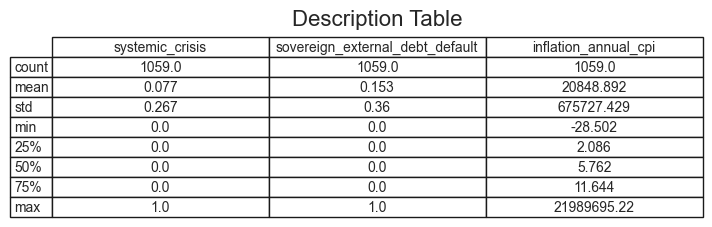

In [81]:
##get data description

data_description = data_df[['systemic_crisis','sovereign_external_debt_default','inflation_annual_cpi']].describe().round(3)
fig, ax = plt.subplots(figsize=(7, 2))
ax.axis('off')

table = ax.table(cellText=data_description.values,
                 colLabels=data_description.columns,
                 rowLabels=data_description.index,
                 cellLoc='center',
                 loc='upper center')


table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.title('Description Table',fontsize=16)
plt.savefig('data description.png',bbox_inches='tight',facecolor='white')
plt.show()

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

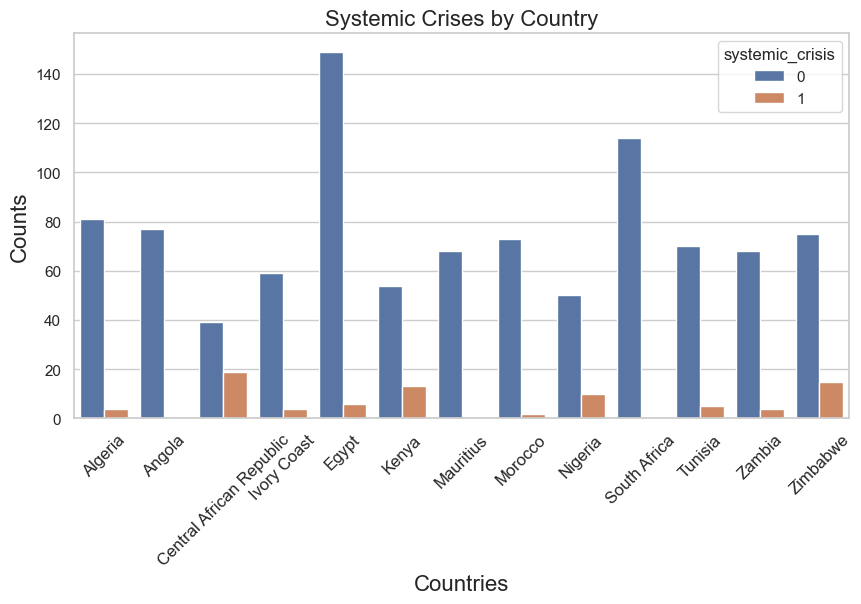

In [16]:
##plot systemic crisis by countries on a barplot
plt.figure(figsize=(10, 5))
sns.countplot(x='country', hue='systemic_crisis', data=data_df)
plt.xlabel('Countries', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.title('Systemic Crises by Country', fontsize=16)
plt.savefig('count systemic crises countreis.png',bbox_inches='tight',facecolor='white')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_12116\2316218460.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=subset, x='year', y='systemic_crisis', ci=None)
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\

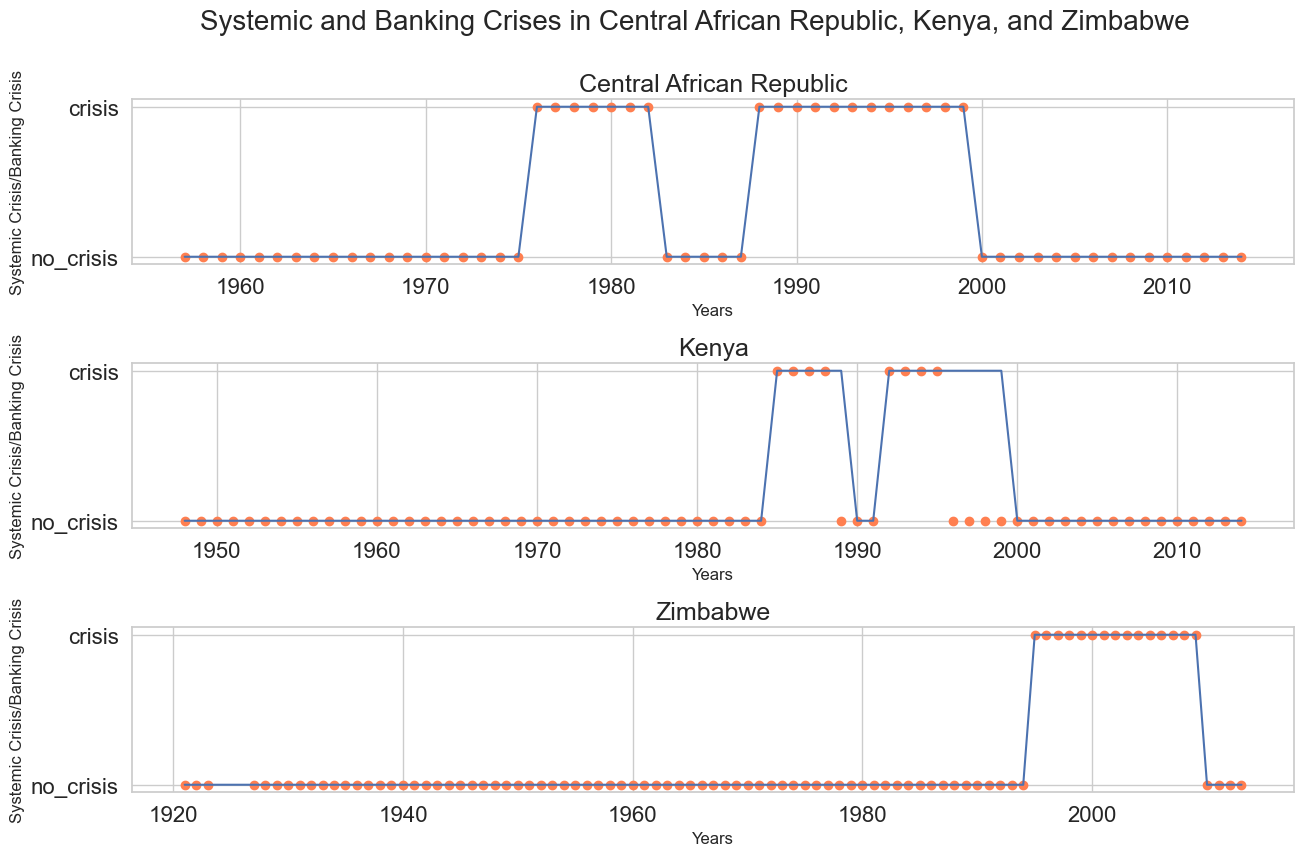

In [31]:
#plot time series of systemic crisis for African Republic, Kenya, and Zimbabwe with banking crisis
systemic = data_df[['year', 'country', 'systemic_crisis', 'exch_usd', 'banking_crisis']]
systemic = systemic[(systemic['country'] == 'Central African Republic') | (systemic['country'] == 'Kenya') | (systemic['country'] == 'Zimbabwe')]

plt.figure(figsize=(15, 9))
plt.suptitle('Systemic and Banking Crises in Central African Republic, Kenya, and Zimbabwe', fontsize=20)

count = 1

for country in systemic.country.unique():
    plt.subplot(len(systemic.country.unique()), 1, count)
    subset = systemic[(systemic['country'] == country)]
    sns.lineplot(data=subset, x='year', y='systemic_crisis', ci=None)
    plt.scatter(subset['year'], subset["banking_crisis"], color='coral', label='Banking Crisis')
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Systemic Crisis/Banking Crisis')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.title(country, fontsize=18)
    count += 1

plt.savefig('sys bank crisis.png',bbox_inches='tight',facecolor='white')
plt.show()


E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

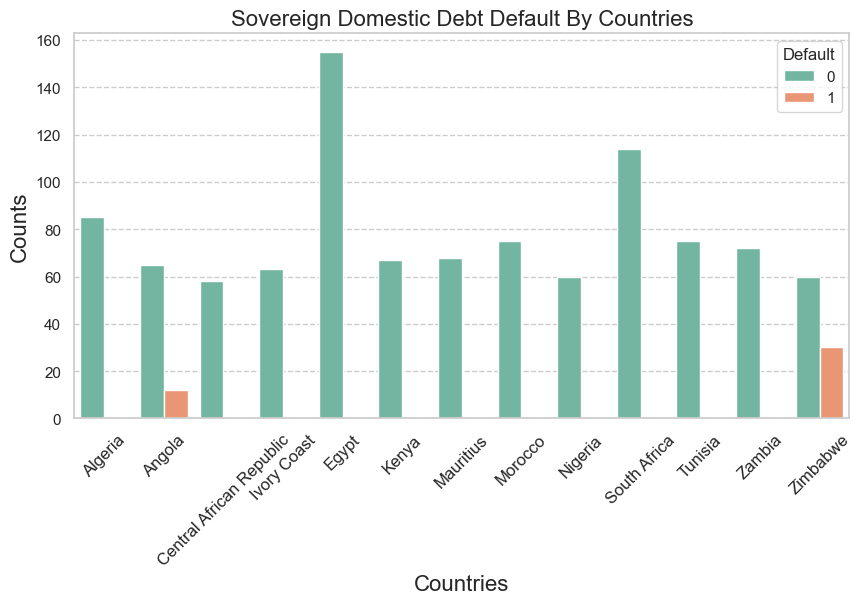

In [41]:
#plot sovereign debt against each country
plt.figure(figsize=(10, 5))
sns.set_palette('Set2')  # Set color palette
sns.countplot(x='country', hue='domestic_debt_in_default', data=data_df)
plt.xlabel('Countries', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.title('Sovereign Domestic Debt Default By Countries', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--')  # Add grid lines
plt.legend(title='Default', loc='upper right')
plt.savefig('soverign domestic default.png',bbox_inches='tight',facecolor='white')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_12116\201911092.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=subset, x='year', y='domestic_debt_in_default', ci=None, color='skyblue')
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.us

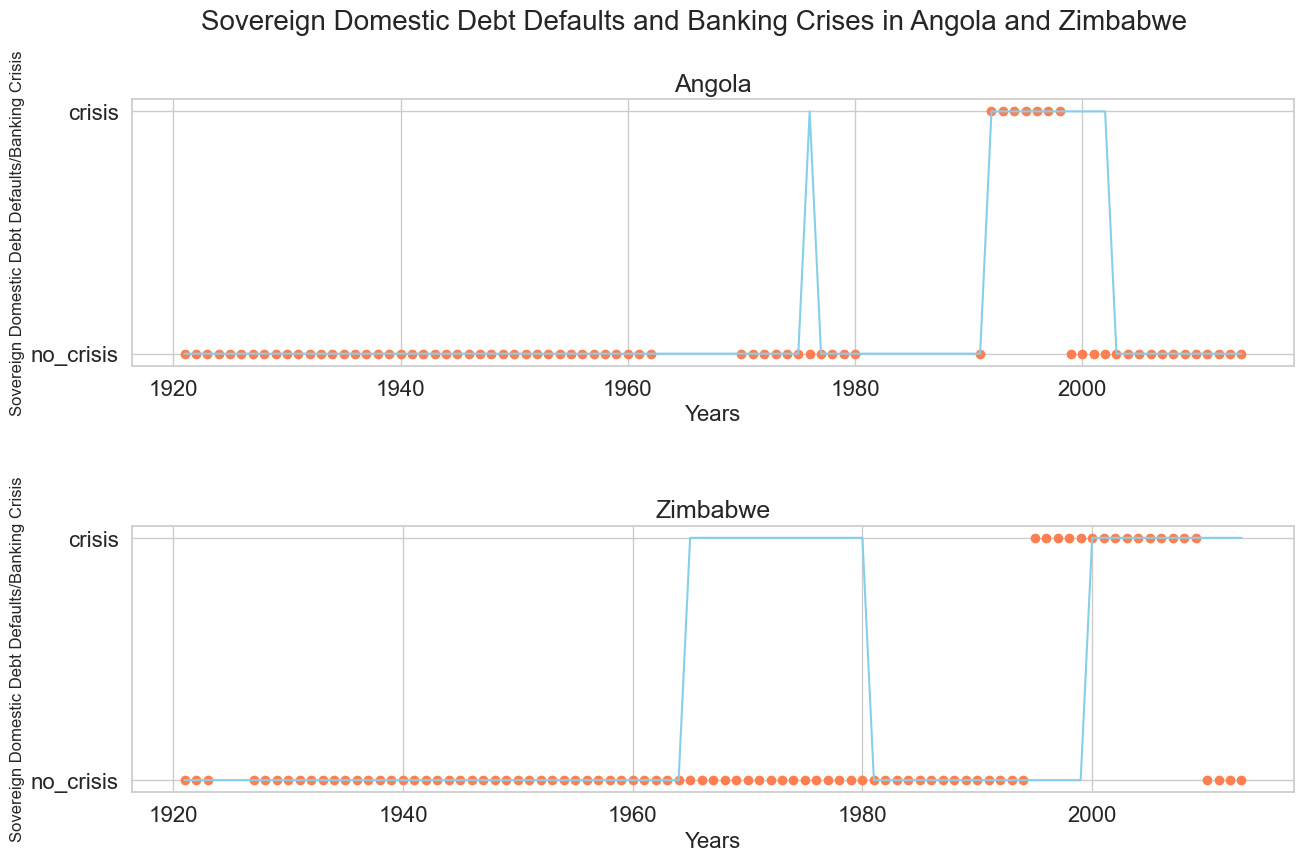

In [53]:
#plot soverign debt values for Angola and Zimbabwe with banking crisis
plt.figure(figsize=(15, 9))
plt.suptitle('Sovereign Domestic Debt Defaults and Banking Crises in Angola and Zimbabwe', fontsize=20)
count = 1
for country in sovereign.country.unique():
    plt.subplot(len(sovereign.country.unique()), 1, count)
    subset = sovereign[(sovereign['country'] == country)]
    sns.lineplot(data=subset, x='year', y='domestic_debt_in_default', ci=None, color='skyblue')
    plt.scatter(subset['year'], subset["banking_crisis"], color='coral', label='Banking Crisis')
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylabel('Sovereign Domestic Debt Defaults/Banking Crisis', fontsize=12)
    plt.title(country, fontsize=18)
    count += 1
plt.savefig('soverign defauly angole zimb.png',bbox_inches='tight',facecolor='white')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_12116\12636398.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='inflation_crises', data=subset, ci=None)
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\S

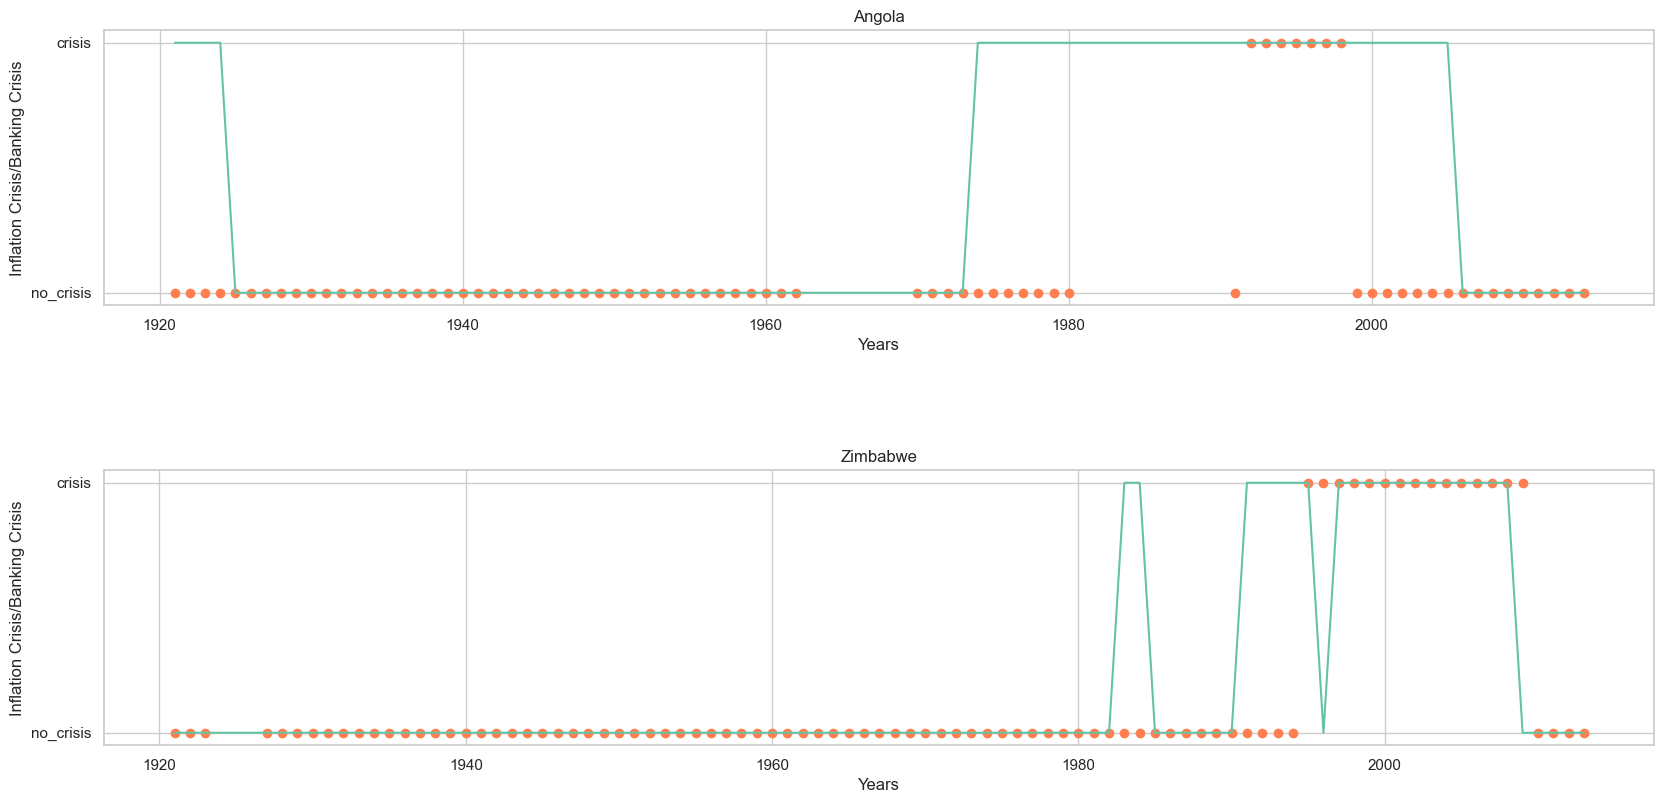

In [82]:
infla = data_df[['year','country', 'inflation_crises', 'inflation_annual_cpi', 'banking_crisis']]
infla = infla[(infla['country'] == 'Angola') | (infla['country']=='Zimbabwe') ]
infla = infla.replace(to_replace=2, value=1, regex=False)

plt.figure(figsize=(20,15))

for i, country in enumerate(['Angola','Zimbabwe'], start=1):
    plt.subplot(3, 1, i)
    subset = infla[infla['country'] == country]
    sns.lineplot(x='year', y='inflation_crises', data=subset, ci=None)
    plt.scatter(subset['year'], subset['banking_crisis'], color='coral', label='Banking Crisis')
    plt.xlabel('Years')
    plt.ylabel('Inflation Crisis/Banking Crisis')
    plt.title(country)

plt.subplots_adjust(hspace=0.6)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_12116\3235942869.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=subset, x='year', y='inflation_annual_cpi', ci=None, color=colors[i-1])
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.us

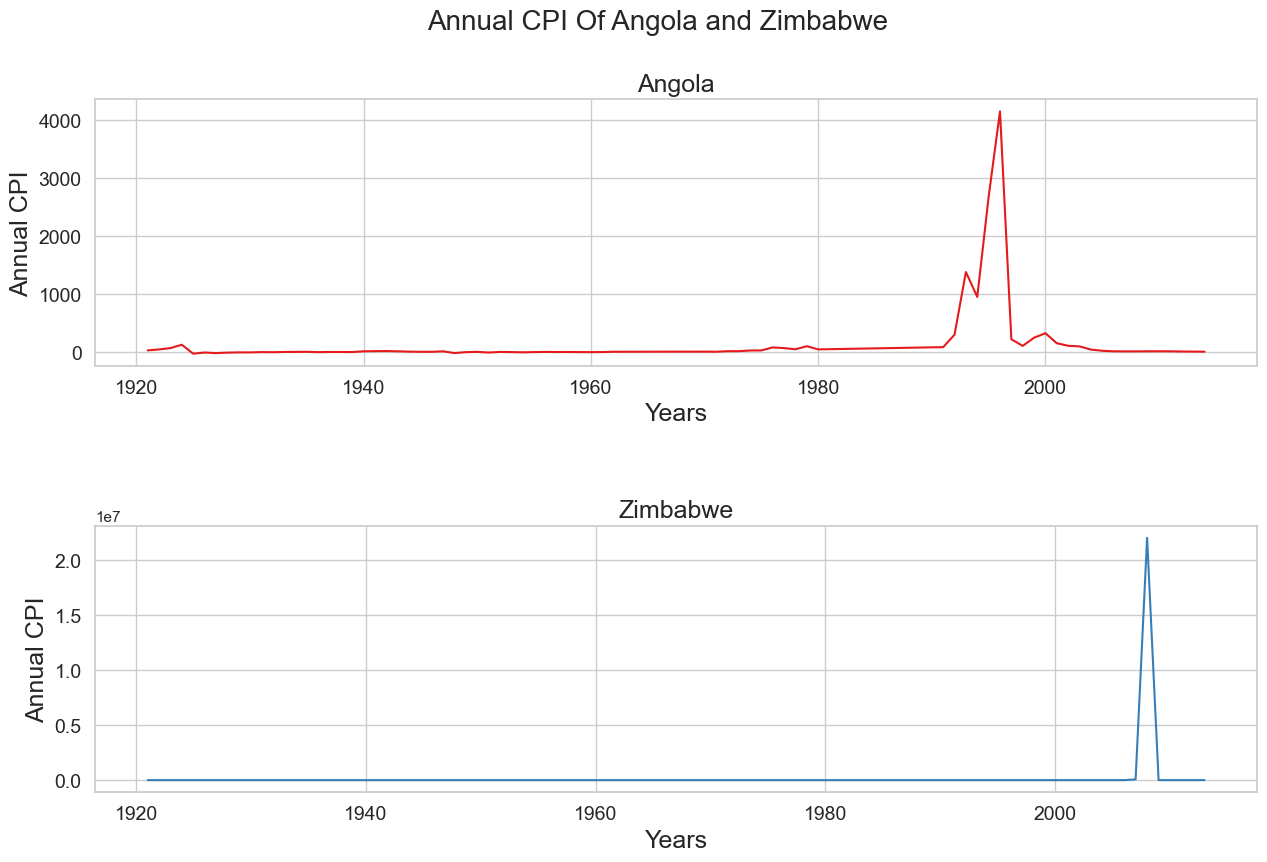

In [83]:
##plot time series of CPI of angole and zimbabwe
plt.figure(figsize=(15, 9))
plt.suptitle('Annual CPI Of Angola and Zimbabwe', fontsize=20)

# Define a custom color palette
colors = sns.color_palette('Set1', n_colors=len(infla['country'].unique()))

for i, country in enumerate(infla['country'].unique(), start=1):
    plt.subplot(len(infla['country'].unique()), 1, i)
    subset = infla[infla['country'] == country]
    sns.lineplot(data=subset, x='year', y='inflation_annual_cpi', ci=None, color=colors[i-1])
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years', fontsize=18)
    plt.ylabel('Annual CPI', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(country, fontsize=18)
plt.savefig('annual_cpi.png',bbox_inches='tight',facecolor='white')
plt.show()
